## ESADE MIBA Artifitial Intelligence Final Project 
### Team Magic Leap (formerly known as Team WWDC 2017)

#### Team Member: Nancy Xiaowen Jiang, Che-Min Tsai, Lifu Zuo

##### Agenda
1. Define the digital event 
2. Definition of the problem (comment lines will be added later in the following notebooks)
3. Scrap the data
4. Clean the dataset (Including Topic analysis)
5. Identify several types of users using different methods
6. Propose a variable for a selected variable that is easy to explain to a decision-maker
7. Propose a variable for the same selected variable that is as accurate as possible

#### In this notebook, we will cover Part 6 & 7

In [1]:
%pylab inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")

ERROR:root:File `'helper_functions.py'` not found.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# A helper function to display the tree.
# NOTE: requires pydotplus and graphviz libraries. 
    
from IPython.display import Image 
import pydotplus
def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 

### Load the dataset

In [16]:
#Get the cleaned data we have
clean_df = pd.read_csv("C:/Users/maximjxw/Desktop/AI Final Project/clean_data.csv", index_col = 0)
clean_df1 = pd.DataFrame(clean_df)
clean_df1.head()

,full_text,favorite_count,retweet_count,text_number,location,user_followers,user_friends,user_listed,user_favourites_count,user_statuses_number,Is_this_a_retweet,retweet_fulltext,tweet_create_date,tweet_create_time,user_create_date,user_create_time
0,People are freaking out over the @magicleap pr...,0,0,105,"New York, NY",2323200,4026,44594,7814,174691,0,0,2017-12-20,19:30:22,2007-3-28,22:39:21
1,Google’s Magic Leap Just Revealed An Impressiv...,0,0,73,NaN,0,128,0,1,9,0,0,2018-1-01,00:16:42,2017-12-03,21:11:06
2,"RT @magicleap: World, meet Magic Leap One. Mag...",0,1570,131,Vancouver,1007,1231,32,1567,4990,1,"World, meet Magic Leap One. Magic Leap One, me...",2017-12-20,19:30:24,2011-6-05,20:55:09
3,"After 6 years and $1.9 billion in funding, sec...",0,0,110,"Baketown California, USA",15560,4199,162,26350,32491,0,0,2017-12-20,19:30:13,2010-11-20,03:40:07
4,"Here it is, people, the @magicleap One: https:...",0,0,87,"San Francisco, CA",169,208,133,77,1993,0,0,2017-12-20,19:30:12,2016-1-21,17:52:00


In [21]:
#identify whether a tweet is being liked or not
favorited = []
for i in clean_df1['favorite_count']:
    if i == 0:
        favorited.append(0)
    else:
        favorited.append(1)

clean_df1.loc[:,'favorited'] = favorited
clean_df1[['favorite_count','favorited']]

,favorite_count,favorited
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Now let's do further analysis:

- First we will focus on models that is easy to explain to decision maker (Decision Tree)
- Then we will focus more on models that is more accurate

#### 1. Models that easy to explain —— Decision Tree

In [27]:
#clean datasets with only numerical information
X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

feature_names = X_data.columns
class_labels = ["Not favorited", "Favorited"]

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)


# score at training
score_test = tree.fit(X,y).score(X, y)
print("Accuracy Training         :", score_test)

scores = cross_val_score(tree, X, y, cv=10)
print("Accuracy Cross Validation : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Training         : 0.919489836588
Accuracy Cross Validation : 0.90 (+/- 0.03)


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,10)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best score:  0.907370517928


#### Random Forest

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_leaf_nodes=4)
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

Accuracy: 0.89 (+/- 0.01)


text_number              0.379685
retweet_count            0.228396
Is_this_a_retweet        0.195105
user_listed              0.094457
user_followers           0.068586
user_friends             0.022782
user_favourites_count    0.010989
user_statuses_number     0.000000
dtype: float64

Now further analysis for this dataset and plot the tree:

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best score:  0.906972111554


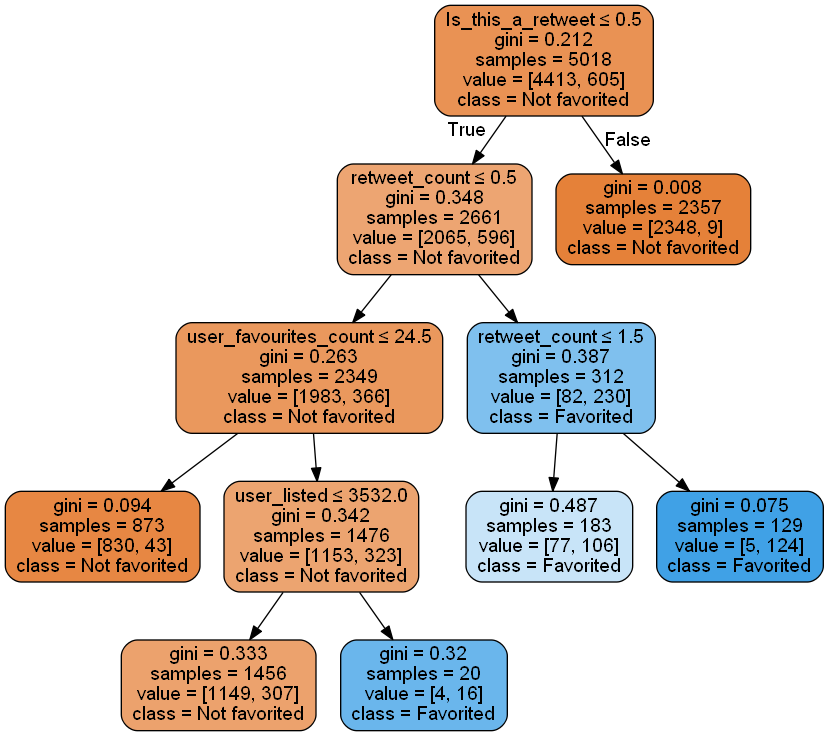

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           #'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,7)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


Image(plot_tree(grid.best_estimator_, feature_names, class_labels))

In [38]:
important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

retweet_count            0.201127
user_favourites_count    0.133398
user_listed              0.122923
text_number              0.118659
Is_this_a_retweet        0.115619
user_statuses_number     0.111245
user_friends             0.104410
user_followers           0.092618
dtype: float64

##### GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier()
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

Accuracy: 0.91 (+/- 0.02)


user_statuses_number     0.201501
text_number              0.168311
user_listed              0.122142
retweet_count            0.109864
Is_this_a_retweet        0.107285
user_followers           0.107164
user_friends             0.103497
user_favourites_count    0.080235
dtype: float64

#### To summarize,

#### 2. Models that are more accurate

In [41]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First we use linear regression:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Model Favorited - R2: 0.0407



Coefficients [Diameter] [Toppings]  [  1.56342612e-06   1.32088731e-03  -2.33969187e-01   1.23432029e-07
   1.89366123e-06   2.58346631e-05   4.92701384e-07  -1.65269186e-07]
R-squared of the train model: 0.1341
R-squared of the test model: 0.0407


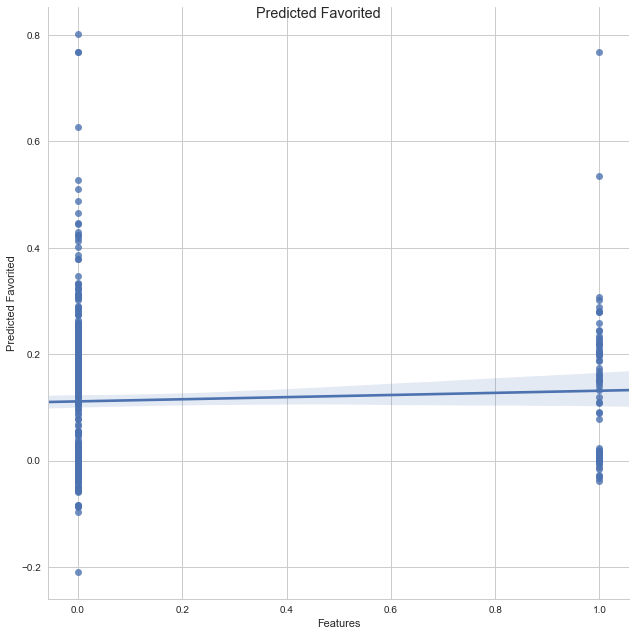

In [47]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.33)

model1=LinearRegression()
model1.fit(X_train,Y_train)
print("Model Favorited - R2: {0:.4f}".format(model1.score(X_test,Y_test)))
print()


dfRM=pd.DataFrame()
dfRM["I"]=range(1,len(Y_test)+1)
dfRM["Features"]=Y_test
dfRM["Predicted Favorited"]=model1.predict(X_test)
sns.lmplot(x="Features",y="Predicted Favorited", data=dfRM, size=9)
plt.suptitle("Predicted Favorited")

print("Coefficients [Diameter] [Toppings] ",model1.coef_)

print("R-squared of the train model: {0:.4f}".format(model1.score(X,y)))
print("R-squared of the test model: {0:.4f}".format(model1.score(X_test,Y_test)))


Now we try to use deep learning:

In [121]:
#We import libraries for linear algebra, graphs, and evaluation of results
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.ndimage.filters import uniform_filter1d

In [122]:
#Keras is a high level neural networks library, based on either tensorflow or theano
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import Conv1D, MaxPool1D, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam

In [123]:
#Load the data
X_data = clean_df1[['retweet_count','text_number','Is_this_a_retweet','user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
y = clean_df1['favorited']

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [125]:
#Scale each observation to zero mean and unit variance
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

In [126]:
x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2)
x_test = np.stack([x_test, uniform_filter1d(x_test, axis=1, size=200)], axis=2)

In [127]:
model = Sequential()
model.add(Conv2D(20, (5, 5), input_shape=(28, 28, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [128]:
def batch_generator(x_train, y_train, batch_size=32):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch

In [131]:
#Start with a slightly lower learning rate, to ensure convergence
model.compile(optimizer=Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=0, epochs=5,
                           steps_per_epoch=x_train.shape[1]//32)

ValueError: Error when checking input: expected conv2d_12_input to have 4 dimensions, but got array with shape (1004, 8, 2)

In [132]:
model.compile(optimizer=Adam(4e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=2, epochs=40,
                           steps_per_epoch=x_train.shape[1]//32)

ValueError: Error when checking input: expected conv2d_12_input to have 4 dimensions, but got array with shape (1004, 8, 2)

#### To summarize,